In [1]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "serif"
import pandas as pd
import seaborn as sns

Load in the catalog constructed in `generate_catalog.ipynb`:

In [2]:
catalog_full = pd.read_pickle("/data/scratch/dc2local/dc2_lensing_catalog.pkl")

Coadds are only available for tracts 3828 and 3829, so we filter to galaxies in those tracts:

In [3]:
catalog = catalog_full[catalog_full["tract"].isin([3828, 3829])]
catalog.rename(
    columns={
        "mag_r": "r-band mag",
        "shear_1": r"$\gamma_1$",
        "shear_2": r"$\gamma_2$",
        "convergence": r"$\kappa$",
    },
    inplace=True,
)

/tmp/ipykernel_601295/1229672294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catalog.rename(


We randomly sample 50,000 of the remaining galaxies and plot a few of their properties:

In [4]:
catalog_subset = catalog.sample(n=50000, random_state=42)

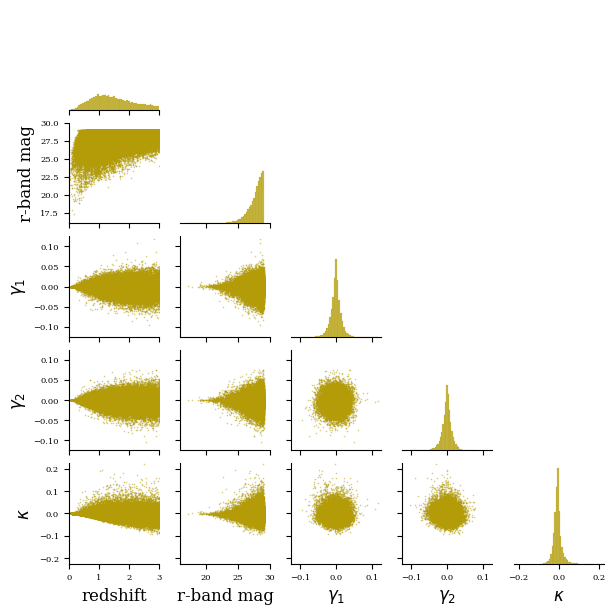

In [5]:
color = "#b39c07"
alpha = 0.5
s = 1
bins = 50
fontsize = 12
ticklabelsize = 6

fig = sns.pairplot(
    catalog_subset[["redshift", "r-band mag", r"$\gamma_1$", r"$\gamma_2$", r"$\kappa$"]],
    corner=True,
    height=1.25,
    plot_kws={"color": color, "edgecolor": color, "alpha": alpha, "s": s},
    diag_kws={"color": color, "edgecolor": color, "bins": bins},
)

for ax in fig.axes.flat:
    if ax is not None:
        ax.set_xlabel(ax.get_xlabel(), fontsize=fontsize)
        ax.set_ylabel(ax.get_ylabel(), fontsize=fontsize)
        ax.tick_params(axis="both", which="major", labelsize=ticklabelsize)

fig.axes[1, 0].set_ylim(16, 30)
fig.axes[2, 0].set_ylim(-0.125, 0.125)
fig.axes[3, 0].set_ylim(-0.125, 0.125)
fig.axes[4, 0].set_ylim(-0.225, 0.225)
fig.axes[4, 0].set_xlim(0, 3)
fig.axes[4, 1].set_xlim(16, 30)
fig.axes[4, 2].set_xlim(-0.125, 0.125)
fig.axes[4, 3].set_xlim(-0.125, 0.125)
fig.axes[4, 4].set_xlim(-0.225, 0.225)

fig.savefig(
    "figures/dc2galaxyproperties.png", dpi=600, transparent=True, bbox_inches="tight", pad_inches=0
)